In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
tips=sns.load_dataset('tips') # tips 패키지 불러오기
print(tips)
print('\n')
print(tips.dtypes) # 데이터 형 확인
print('\n')
tips.info() # 데이터형 확인
print('\n')
print(tips.shape) # 데이터형 확인 
print('\n')
tips.isnull().sum() #변수별 결측치 확인
print('\n')
tips.describe() # 수치형 자료 요약통계량

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Colu

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# 문제 tip자료를 이용하여 식사대금 대비 팁의 비율이 어떤 경우에 가장 높아지는 지 계산 및 찾기

In [24]:
tips['rate']=tips['tip']/tips['total_bill']
print(tips)

     total_bill   tip     sex smoker   day    time  size      rate
0         16.99  1.01  Female     No   Sun  Dinner     2  0.059447
1         10.34  1.66    Male     No   Sun  Dinner     3  0.160542
2         21.01  3.50    Male     No   Sun  Dinner     3  0.166587
3         23.68  3.31    Male     No   Sun  Dinner     2  0.139780
4         24.59  3.61  Female     No   Sun  Dinner     4  0.146808
..          ...   ...     ...    ...   ...     ...   ...       ...
239       29.03  5.92    Male     No   Sat  Dinner     3  0.203927
240       27.18  2.00  Female    Yes   Sat  Dinner     2  0.073584
241       22.67  2.00    Male    Yes   Sat  Dinner     2  0.088222
242       17.82  1.75    Male     No   Sat  Dinner     2  0.098204
243       18.78  3.00  Female     No  Thur  Dinner     2  0.159744

[244 rows x 8 columns]


# 상위 5개로 보았을 때 비율이 높은 것에 대한 변수 정보는 성별: 남성,흡연여부: 흡연자, 요일: 일요일, 시간대: 저녁, 인원:2명으로 확인된다

In [25]:
tips.sort_values(by=['rate'], ascending=False).head() 

,total_bill,tip,sex,smoker,day,time,size,rate
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535


In [69]:
ttt=tips[['tip','total_bill']]
ttt.corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


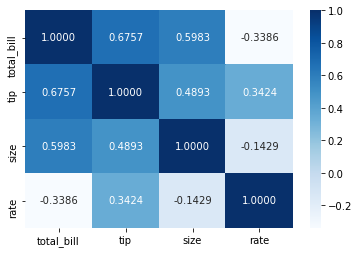

In [32]:
sns.heatmap(tips.corr(), annot=True, cmap='Blues',fmt='.4f') 
plt.show()
#size와 비율의 상관관계는 -0.1429로 약하게 음의 상관관계를 띄고 있다. 사람이 많이 올수록 팁을 주는 비율이 적어진다고 볼 수 있다.
#그 외의 것은 비율변수가 대금과 팁에 관한 비율 변수이므로 나머지는 해석 제외

In [6]:
print(tips.dtypes)
tips.describe()

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
rate           float64
dtype: object


,total_bill,tip,size,rate
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160803
std,8.902412,1.383638,0.951100,0.061072
min,3.070000,1.000000,1.000000,0.035638
25%,13.347500,2.000000,2.000000,0.129127
50%,17.795000,2.900000,2.000000,0.154770
75%,24.127500,3.562500,3.000000,0.191475
max,50.810000,10.000000,6.000000,0.710345


In [50]:
#size 는 수치형이 아닌 명목형으로 분석
#tips['size']=tips.astype({'size':'category'})
tips['size_cut']=pd.cut(tips['size'],bins=[1,3,6],labels=['3인이하','4인이상'])
print(tips['size_cut'])
print(tips.dtypes)

0      3인이하
1      3인이하
2      3인이하
3      3인이하
4      4인이상
       ... 
239    3인이하
240    3인이하
241    3인이하
242    3인이하
243    3인이하
Name: size_cut, Length: 244, dtype: category
Categories (2, object): [3인이하 < 4인이상]
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
rate           float64
size_cut      category
dtype: object


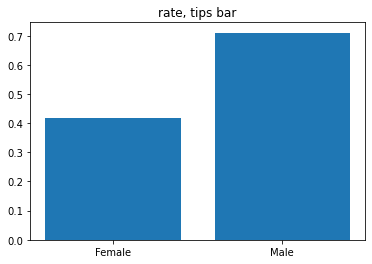

In [35]:
plt.bar(tips.sex,tips.rate)
plt.title('rate, tips bar')
plt.show() #성별로 따졌을 때 남성이 팁을 주는 비율이 높다

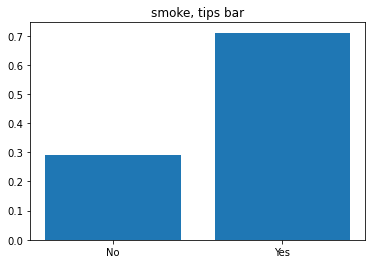

In [47]:
plt.bar(tips.smoker,tips.rate)
plt.title('smoke, tips bar')
plt.show() # 흡연자의 비율이 더 높음

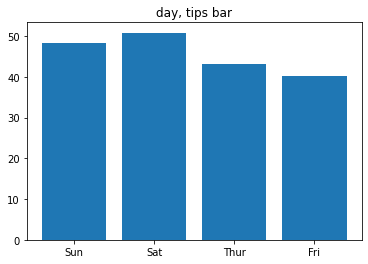

In [48]:
plt.bar(tips.day,tips.total_bill)
plt.title('day, tips bar')
plt.show() # 토요일이 더 지불이 많음

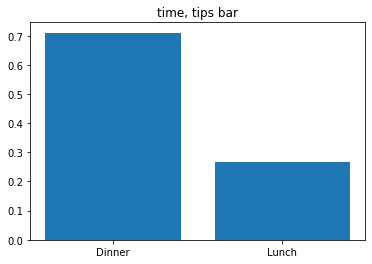

In [49]:
plt.bar(tips.time,tips.rate)
plt.title('time, tips bar')
plt.show() #저녁에 팁이 더 많음

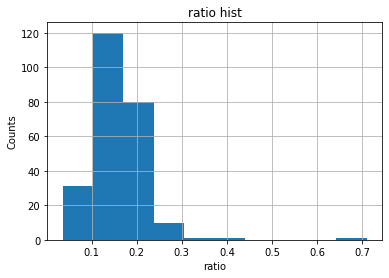

In [13]:
plt.hist(tips.rate)
plt.xlabel('ratio')
plt.ylabel('Counts')
plt.title('ratio hist')
plt.grid(True)
plt.show()   
# 대략 0.1~ 약 0.18사이의 비율이 가장 높다

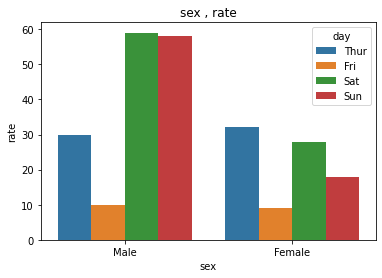

In [14]:
sns.barplot(x='sex',y='rate',estimator=len,hue='day',data= tips)
plt.title('sex , rate')
plt.show() #남성은 토요일 여성은 목요일

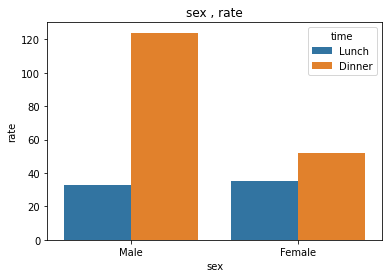

In [58]:
sns.barplot(x='sex',y='rate',estimator=len,hue='time',data= tips)
plt.title('sex , rate')
plt.show() #남성은 토요일 여성은 목요일

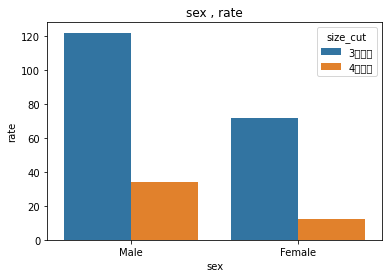

In [65]:
sns.barplot(x='sex',y='rate',estimator=len,hue='size_cut',data= tips)
plt.title('sex , rate')
plt.show() # 목요일에는 여성의 비율이 높으며 그외의 요일에서는 남성의 팁지급비율이 높다

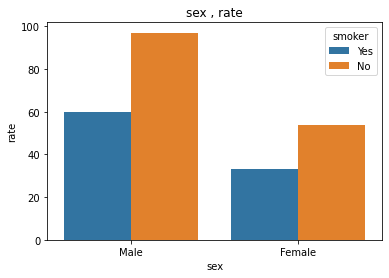

In [66]:
sns.barplot(x='sex',y='rate',estimator=len,hue='smoker',data= tips)
plt.title('sex , rate')
plt.show() # 남성이 전체적으로 높으며 비흡연자가 팁지급비율이 높음

In [74]:
tips.pivot_table('rate',['sex','smoker'],'size_cut',aggfunc='sum') 

size_cut            3인이하      4인이상
sex    smoker                     
Male   Yes      7.426370  1.516124
       No      12.061069  3.523796
Female Yes      5.466725  0.218504
       No       6.679991  1.474083

In [76]:
tips.pivot_table('rate',['sex','time'],'size_cut',aggfunc='sum') 

size_cut            3인이하      4인이상
sex    time                       
Male   Lunch    4.598331  0.658620
       Dinner  14.889108  4.381301
Female Lunch    4.786782  0.711463
       Dinner   7.359933  0.981124

In [77]:
tips.pivot_table('rate',['sex','day'],'size_cut',aggfunc='sum') 

size_cut         3인이하      4인이상
sex    day                     
Male   Thur  4.299675  0.658620
       Fri   1.092326  0.117750
       Sat   7.259637  1.683396
       Sun   6.835800  2.580155
Female Thur  4.147604  0.711463
       Fri   1.794496       NaN
       Sat   3.696566  0.220936
       Sun   2.508050  0.760188

In [83]:
tips.pivot_table('rate','sex','size_cut',aggfunc='sum') 

size_cut,3인이하,4인이상
sex,,
Male,19.487439,5.039921
Female,12.146715,1.692587


# 이상치 제거 후 분석

In [70]:
lm_df=tips
lm_df=lm_df[lm_df['tip']<=5.9] # 3.5625+(1.5*(3.5625-2))
lm_df=lm_df[lm_df['total_bill']<=40.5] # 24.1275+(1.5*(24.1275-13.1475))

In [73]:
lm_df.corr()

,total_bill,tip,size,rate
total_bill,1.000000,0.601499,0.561779,-0.386045
tip,0.601499,1.000000,0.414427,0.387902
size,0.561779,0.414427,1.000000,-0.169404
rate,-0.386045,0.387902,-0.169404,1.000000


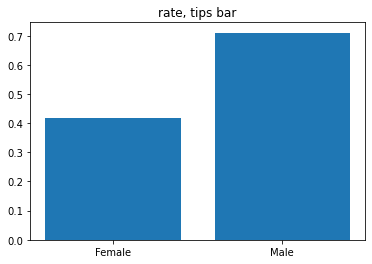

In [78]:
plt.bar(lm_df.sex,lm_df.rate)
plt.title('rate, tips bar')
plt.show() #성별로 따졌을 때 남성이 팁을 주는 비율이 높다

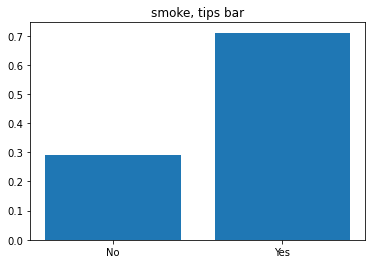

In [79]:
plt.bar(lm_df.smoker,lm_df.rate)
plt.title('smoke, tips bar')
plt.show() # 흡연자의 비율이 더 높음

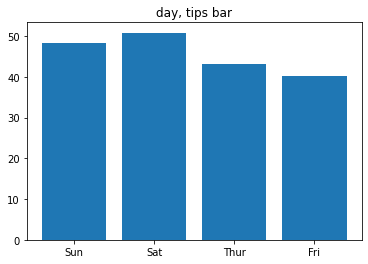

In [80]:
plt.bar(tips.day,tips.total_bill)
plt.title('day, tips bar')
plt.show() # 토요일이 더 지불이 많음

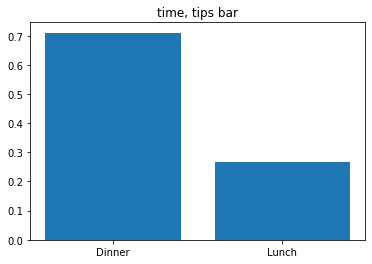

In [81]:
plt.bar(lm_df.time,lm_df.rate)
plt.title('time, tips bar')
plt.show() #저녁에 팁이 더 많음

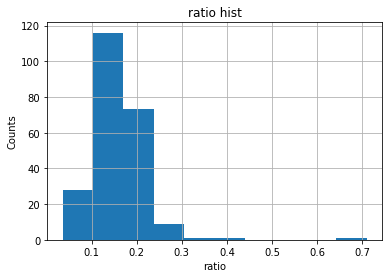

In [82]:
plt.hist(lm_df.rate)
plt.xlabel('ratio')
plt.ylabel('Counts')
plt.title('ratio hist')
plt.grid(True)
plt.show()   
# 대략 0.1~ 약 0.18사이의 비율이 가장 높다

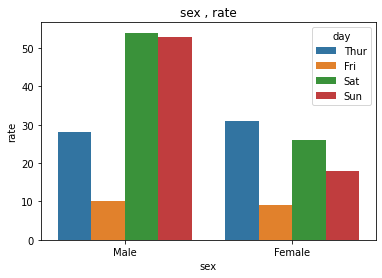

In [84]:
sns.barplot(x='sex',y='rate',estimator=len,hue='day',data= lm_df)
plt.title('sex , rate')
plt.show() 

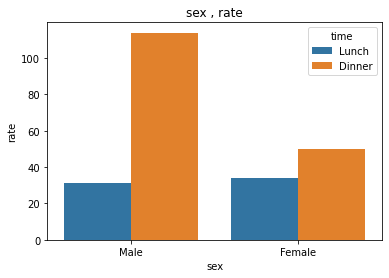

In [85]:
sns.barplot(x='sex',y='rate',estimator=len,hue='time',data= lm_df)
plt.title('sex , rate')
plt.show() #남성은 토요일 여성은 목요일

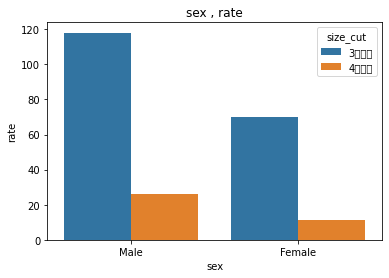

In [87]:
sns.barplot(x='sex',y='rate',estimator=len,hue='size_cut',data= lm_df)
plt.title('sex , rate')
plt.show() # 목요일에는 여성의 비율이 높으며 그외의 요일에서는 남성의 팁지급비율이 높다

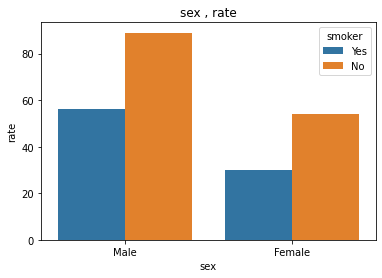

In [88]:
sns.barplot(x='sex',y='rate',estimator=len,hue='smoker',data= lm_df)
plt.title('sex , rate')
plt.show() # 남성이 전체적으로 높으며 비흡연자가 팁지급비율이 높음

In [90]:
lm_df.pivot_table('rate',['sex','smoker'],'size_cut',aggfunc='sum') 

size_cut            3인이하      4인이상
sex    smoker                     
Male   Yes      7.078398  1.235589
       No      11.857142  2.400156
Female Yes      5.179549  0.102522
       No       6.679991  1.474083

In [91]:
lm_df.pivot_table('rate',['sex','time'],'size_cut',aggfunc='sum') 

size_cut            3인이하      4인이상
sex    time                       
Male   Lunch    4.598331  0.341896
       Dinner  14.337209  3.293850
Female Lunch    4.786782  0.595480
       Dinner   7.072758  0.981124

In [92]:
lm_df.pivot_table('rate',['sex','day'],'size_cut',aggfunc='sum') 

size_cut         3인이하      4인이상
sex    day                     
Male   Thur  4.299675  0.341896
       Fri   1.092326  0.117750
       Sat   6.858899  1.165464
       Sun   6.684640  2.010636
Female Thur  4.147604  0.595480
       Fri   1.794496       NaN
       Sat   3.409390  0.220936
       Sun   2.508050  0.760188

In [93]:
lm_df.pivot_table('rate','sex','size_cut',aggfunc='sum') 

size_cut,3인이하,4인이상
sex,,
Male,18.93554,3.635745
Female,11.85954,1.576605
